In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pandas import DataFrame
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

##### Reading the dataset:

In [2]:
data = pd.read_csv("pd_speech_features.csv")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


As you can see, all columns are automatically named with numbers. I specify two columns with desired names so that it's easier to use them (or delete them)

In [4]:
data.rename(columns = {'Unnamed: 0' : 'id', 'Unnamed: 754' : 'class'}, inplace = True)
data = data.iloc[1: , :]

In [5]:
data.head()

,id,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


Here i delete 'id' column. I also seperate features from label column.

In [6]:
X  = data.iloc[: , 1:754]

In [7]:
y = data.iloc[: , 754:755]

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle = True)

standard Scaling features:\
Standardizing features by removing the mean and scaling to unit variance.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

As it's mentioned in HW2, I should check the accuracy in the case where all i predict is label '1'.\
I do it as bellow:

In [10]:
y_ones = []
for i in range(len(y_test)):
  y_ones.append('1')

In [11]:
accuracy_score(y_test, y_ones)*100

70.04405286343612

##### **Model selection:** 
**Decision tree:** \
First, using cross val score, I tune the parameters.

In [12]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)

DT_result = cross_val_score(clf, X_train, y_train)

print('accuracy:', DT_result.mean()*100)

accuracy: 81.66217430368373



| random state | max depth | Accuracy |
| :-: | :-: | :-: |
| 0 | 2 | 81.6
| 2 | 2 | 81.09
| 20 | 2 | 81.66
| 0 | 10 | 77.1
| 0 | 20 | 76.1
| 0 | 30 | 76.1
| 0 | 5 | 80.3
| 0 | 3 | 81.66
| 0 | 1 | 76.005

finding the accuracy on train set:

In [13]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)

0.8620037807183365

Finding the accuracy on test set:

In [14]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.7665198237885462

**Confusion matrix:**\
A confusion matrix M is such that M<sub>ij</sub> is equal to the number of observations known to be in group i and predicted to be in group j.

In [15]:
confusion_matrix(y_test, y_predict)

array([[ 31,  37],
       [ 16, 143]])

**KNN:**\
I, first, tune the parameter:

In [16]:
clf2 = KNeighborsClassifier(n_neighbors=1)
KNN_result = cross_val_score(clf2, X_train, y_train)

print('accuracy:', KNN_result.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

accuracy: 90.54806828391735


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


| n_neighbors | Accuracy |
| :-: |  :-: |
| 5 |  82.9
| 3 |  85.6
| 1  | 90.54
| 7  | 82.99
| 9  | 81.67
| 11  | 82.05
| 16  | 82.04
| 30  | 80.72
| 24  | 81.47
| 28  | 80.9
| 26  | 81.29
| 27  | 79.96

Finding the accuracy on train set:

In [17]:
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


100.0

Finding the accuracy on test set:

In [18]:
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


88.10572687224669

Confusion matrix:

In [19]:
confusion_matrix(y_test, y_predict)

array([[ 48,  20],
       [  7, 152]])

**SVM:**\
parameter tuning:

In [20]:
clf3 = svm.SVC(kernel='rbf', degree=3, C=3)
SVM2_result = cross_val_score(clf3, X_train, y_train)

print('accuracy:', SVM2_result.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

accuracy: 86.01796945193175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| c |  degree | Accuracy |
| :- |-: | :-: |
| 3 | 4 |79.77
| 2 | 4 |78.82
| 2 | 5 |78.82
| 2 | 7 |77.69
| 3 | 6 |77.88
| 4 | 6 |78.26
| 3 | 5 |78.82
| 4 | 5 |78.82
| 3 | 3 |86.58
| 3 | 2 |86.01

Finding accuracy on train set:

In [21]:
clf3.fit(X_train, y_train)
y_predict = clf3.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


98.67674858223062

Finding accuracy on test set:

In [22]:
clf3.fit(X_train, y_train)
y_predict = clf3.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.37885462555066

Making confusion matrix:

In [23]:
confusion_matrix(y_test, y_predict)

array([[ 33,  35],
       [  5, 154]])

**Random forrest:**\
parameter tuning:

In [24]:
clf4 = RandomForestClassifier(max_depth=30, random_state=0, n_estimators = 50)

result = cross_val_score(clf4, X_train, y_train)

print('accuracy:', result.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

accuracy: 87.14645103324348


| max depth | random state | n_estimator |Accuracy |
| :-: |:-: | :-: | :-: |
| 5 | 0 | 50 |85.06
| 3 | 0 | 50 |82.9
| 6 | 0 | 50 |84.8
| 8 | 0 | 50 |86.01
| 10 | 0 | 50 |86.19
| 15 | 0 | 50 |86.95
| 20 | 0 | 50 |87.14
| 30 | 0 | 50 |87.14
| 30 | 0 | 30 |85.44
| 30 | 0 | 60 |86.57

Accuracy on train set:

In [25]:
clf4.fit(X_train, y_train)
y_predict = clf4.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


100.0

In [26]:
clf4.fit(X_train, y_train)
y_predict = clf4.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


85.46255506607929

Accuracy on test set:

In [27]:
confusion_matrix(y_test, y_predict)

array([[ 39,  29],
       [  4, 155]])

### **PCA** 
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.
As there are a lot of features in this dataset, it is convenient to use PCA.

In [28]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train = pca.transform(X_train)

Making a dataframe from the proccessed data.(train data)

In [29]:
X_train = pd.DataFrame(X_train)

Doing PCA on test data.

In [30]:
pca.fit(X_test)
X_test = pca.transform(X_test)

**Decision tree:**

In [37]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)
result = cross_val_score(clf, X_train, y_train)
print('accuracy:', result.mean()*100)

accuracy: 80.90566037735849



| random state | max depth | Accuracy |
| :-: | :-: | :-: |
| 0 | 2 | 80.90
| 2 | 2 | 80.90
| 20 | 2 | 80.90
| 0 | 1 | 78.26
| 0 | 15 | 77.49
| 0 | 10 | 78.25

Accuracy on train set:

In [80]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.8109640831758

Accuracy on test set:

In [81]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


71.36563876651982

Confusion matrix:

In [40]:
confusion_matrix(y_test, y_predict)

array([[ 39,  29],
       [  7, 152]])

**KNN:**

In [53]:
clf = KNeighborsClassifier(n_neighbors=1)
KNN_result = cross_val_score(clf, X_train, y_train)

print('accuracy:', KNN_result.mean()*100)

accuracy: 89.97843665768194


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

| n_neighbors | Accuracy |
| :-: |  :-: |
| 5 |  83.94
| 3 |  86.3
| 1  | 89.97
| 7  | 83.75

Accuracy on train set:

In [46]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


100.0

Accuracy on test set:

In [54]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


65.63876651982379

Confusion matrix:

In [55]:
confusion_matrix(y_test, y_predict)

array([[ 13,  55],
       [ 23, 136]])

**SVM:**

In [77]:
clf = svm.SVC(kernel='rbf', degree=2, C=10)
SVM2_result = cross_val_score(clf, X_train, y_train)

print('accuracy:', SVM2_result.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

accuracy: 86.77628032345014


| c |  degree | Accuracy |
| :- |-: | :-: |
| 1 | 2 |86.20
| 1 | 3 |86.20
| 1 | 4 |86.20
| 2 | 3 |86.20
| 2 | 10 |86.77

Accuracy on train set:

In [78]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.8109640831758

Accuracy on test set:

In [79]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


71.36563876651982

Confusion matrix:

In [64]:
confusion_matrix(y_test, y_predict)

array([[ 64,   4],
       [  0, 159]])

**Random Forrest:**

In [72]:
clf = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 50)

result = cross_val_score(clf, X_train, y_train)

print('accuracy:', result.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

accuracy: 81.85444743935311


| max depth | random state | n_estimator |Accuracy |
| :-: |:-: | :-: | :-: |
| 5 | 0 | 50 |78.45
| 40 | 0 | 50 |81.85
| 30 | 0 | 30 |82.23
| 30 | 0 | 50 |81.85
| 30 | 0 | 70 |81.09
| 50 | 0 | 50 |81.85

Accuracy on train set:

In [73]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
accuracy_score(y_train, y_predict)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


100.0

Accuracy on test set:

In [74]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


69.16299559471366

Confusion matrix:

In [75]:
confusion_matrix(y_test, y_predict)

array([[  1,  67],
       [  3, 156]])

Another way to check the accuracy:

In [76]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.25      0.01      0.03        68
           1       0.70      0.98      0.82       159

    accuracy                           0.69       227
   macro avg       0.47      0.50      0.42       227
weighted avg       0.56      0.69      0.58       227



Before PCA:


| model |cross validation | test | train |
| :-: |:-: | :-: | :-: |
| Desicion tree | 81.6| 76.6 | 86.2
| KNN | 90 | 88 |100
| SVM | 86.01 | 82.3 |98
| Random forrest | 87.1 | 85.4 | 100


After PCA:


| model |cross validation | test | train |
| :-: |:-: | :-: | :-: |
| Desicion tree | 80.90| 81.3 | 99.8
| KNN | 89.9 | 65 |100
| SVM | 86.77 | 71.3 |99.8
| Random forrest | 81.8 | 69.1 | 100


As it was obvious (Due to the loss of data), the accuracy decreased after doing PCA.\
Overall PCA will help us to reduce the time needed for trainin, although it ,mostly, will reduce the accuracy.\
It can be seen that random forrest and KNN are overfitting (both after and before PCA).

**PLOTS:**

In [86]:
res = []
ind = []

for i in range(1,20):
  clf = KNeighborsClassifier(n_neighbors=i)
  KNN_result = cross_val_score(clf, X_train, y_train).mean()
  res.append(KNN_result)
  ind.append(i)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

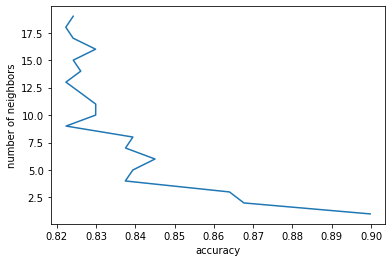

In [88]:
plt.plot(res,ind)
plt.xlabel("accuracy")
plt.ylabel("number of neighbors")
plt.show()

As the number of neighbors increases, accuracy decreases.

In [94]:
res =[]
ind =[]
for i in range(2, 40, 2):
  clf = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
  clf.fit(X_train, y_train)
  result = cross_val_score(clf, X_train, y_train).mean()
  res.append(result)
  ind.append(i)

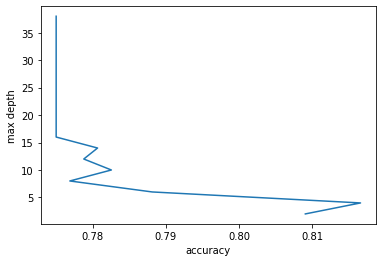

In [97]:
plt.plot(res,ind)
plt.xlabel("accuracy")
plt.ylabel("max depth")
plt.show()

As the max depth increases, accuracy decreases.